In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
def tradeoff(df, filter_model=None, filter_culture=None, filter_language=None):
    # Apply filters
    filtered_df = df.copy()
    if filter_model is not None:
        filtered_df = filtered_df[filtered_df['Model'] == filter_model]
    if filter_culture is not None:
        filtered_df = filtered_df[filtered_df['Culture'] == filter_culture]
    if filter_language is not None:
        filtered_df = filtered_df[filtered_df['Language'] == filter_language]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Subplot 1: Color grouped by Model
    unique_models = filtered_df['Model'].unique()
    colors_model = plt.cm.tab10(range(len(unique_models)))
    color_map_model = dict(zip(unique_models, colors_model))
    
    for model in unique_models:
        model_data = filtered_df[filtered_df['Model'] == model]
        axes[0].scatter(model_data['Bias Score'], model_data['Cultural Accuracy'], 
                       color=color_map_model[model], label=model, s=100)
    
    axes[0].set_xlabel('Bias Score (closer to 0 is better)')
    axes[0].set_ylabel('Cultural Accuracy (higher is better)')
    axes[0].set_title('Grouped by Model')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[0].grid(True)
    
    # Subplot 2: Color grouped by Culture
    unique_cultures = filtered_df['Culture'].unique()
    colors_culture = plt.cm.tab10(range(len(unique_cultures)))
    color_map_culture = dict(zip(unique_cultures, colors_culture))
    
    for culture in unique_cultures:
        culture_data = filtered_df[filtered_df['Culture'] == culture]
        axes[1].scatter(culture_data['Bias Score'], culture_data['Cultural Accuracy'], 
                       color=color_map_culture[culture], label=culture, s=100)
    
    axes[1].set_xlabel('Bias Score (closer to 0 is better)')
    axes[1].set_ylabel('Cultural Accuracy (higher is better)')
    axes[1].set_title('Grouped by Culture')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[1].grid(True)
    
    # Subplot 3: Color grouped by Language
    unique_languages = filtered_df['Language'].unique()
    colors_language = plt.cm.tab10(range(len(unique_languages)))
    color_map_language = dict(zip(unique_languages, colors_language))
    
    for language in unique_languages:
        language_data = filtered_df[filtered_df['Language'] == language]
        axes[2].scatter(language_data['Bias Score'], language_data['Cultural Accuracy'], 
                       color=color_map_language[language], label=language, s=100)
    
    axes[2].set_xlabel('Bias Score (closer to 0 is better)')
    axes[2].set_ylabel('Cultural Accuracy (higher is better)')
    axes[2].set_title('Grouped by Language')
    axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()

In [27]:
def shift_scatter(df, before_model, after_model):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Before Shift
    before_data = df[df['Model'] == before_model].copy()
    before_data['combo'] = before_data['Culture'] + '-' + before_data['Language']
    
    # Create color mapping based on Culture-Language combinations
    unique_combos = before_data['combo'].unique()
    colors = plt.cm.tab10(range(len(unique_combos)))
    color_map = dict(zip(unique_combos, colors))
    
    for combo in unique_combos:
        combo_data = before_data[before_data['combo'] == combo]
        axes[0].scatter(combo_data['Bias Score'], combo_data['Cultural Accuracy'], 
                       color=color_map[combo], label=combo, s=100)
    
    axes[0].set_xlabel('Bias Score (closer to 0 is better)')
    axes[0].set_ylabel('Cultural Accuracy (higher is better)')
    axes[0].set_title(f'Before Shift: {before_model}')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[0].grid(True)
    
    # After Shift
    after_data = df[df['Model'] == after_model].copy()
    after_data['combo'] = after_data['Culture'] + '-' + after_data['Language']
    
    for combo in after_data['combo'].unique():
        combo_data = after_data[after_data['combo'] == combo]
        axes[1].scatter(combo_data['Bias Score'], combo_data['Cultural Accuracy'], 
                       color=color_map.get(combo, 'gray'), label=combo, s=100)
    
    axes[1].set_xlabel('Bias Score (closer to 0 is better)')
    axes[1].set_ylabel('Cultural Accuracy (higher is better)')
    axes[1].set_title(f'After Shift: {after_model}')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.savefig('shift_visualization.png', bbox_inches='tight')
    plt.show()

In [28]:
def shift_comparison(df, before_model, after_model, group_by='culture', metric='accuracy'):
    """
    Visualize before-after comparison for each group with bar plots showing the change.
    
    Parameters:
    - df: DataFrame with Model, Culture, Language, Bias Score, Cultural Accuracy
    - before_model: Name of the baseline model
    - after_model: Name of the comparison model
    - group_by: 'culture', 'language', or 'combo' (culture-language pair)
    - metric: 'accuracy' for Cultural Accuracy or 'bias' for Bias Score
    """
    before_data = df[df['Model'] == before_model].copy()
    after_data = df[df['Model'] == after_model].copy()
    
    # Create grouping column
    if group_by == 'culture':
        before_data['group'] = before_data['Culture']
        after_data['group'] = after_data['Culture']
        title_suffix = 'Culture'
    elif group_by == 'language':
        before_data['group'] = before_data['Language']
        after_data['group'] = after_data['Language']
        title_suffix = 'Language'
    else:  # combo
        before_data['group'] = before_data['Culture'] + '-' + before_data['Language']
        after_data['group'] = after_data['Culture'] + '-' + after_data['Language']
        title_suffix = 'Culture-Language Pair'
    
    # Select metric column
    metric_col = 'Cultural Accuracy' if metric == 'accuracy' else 'Bias Score'
    metric_label = 'Cultural Accuracy (higher is better)' if metric == 'accuracy' else 'Bias Score (closer to 0 is better)'
    
    # Aggregate by group if culture or language
    if group_by in ['culture', 'language']:
        before_grouped = before_data.groupby('group')[metric_col].mean().reset_index()
        after_grouped = after_data.groupby('group')[metric_col].mean().reset_index()
        
        merged = before_grouped.merge(after_grouped, on='group', suffixes=('_before', '_after'))
    else:
        # For combo, no aggregation needed
        merged = before_data[['group', metric_col]].merge(
            after_data[['group', metric_col]], 
            on='group', 
            suffixes=('_before', '_after')
        )
    
    # Calculate change
    merged['change'] = merged[f'{metric_col}_after'] - merged[f'{metric_col}_before']
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x_pos = range(len(merged))
    width = 0.35
    
    # Plot before and after bars
    bars1 = ax.bar([x - width/2 for x in x_pos], merged[f'{metric_col}_before'], 
                   width, label='Before', alpha=0.8, color='steelblue')
    bars2 = ax.bar([x + width/2 for x in x_pos], merged[f'{metric_col}_after'], 
                   width, label='After', alpha=0.8, color='coral')
    
    # Add change annotations
    for i, (before_val, after_val, change) in enumerate(zip(
        merged[f'{metric_col}_before'], 
        merged[f'{metric_col}_after'],
        merged['change']
    )):
        # Arrow showing direction of change
        arrow_symbol = '↑' if change > 0 else '↓' if change < 0 else '→'
        color = 'green' if (change > 0 and metric == 'accuracy') or (change < 0 and metric == 'bias') else 'red'
        ax.text(i, max(before_val, after_val) + 0.02, f'{arrow_symbol}{abs(change):.3f}', 
               ha='center', va='bottom', fontsize=8, color=color, fontweight='bold')
    
    ax.set_xlabel(title_suffix)
    ax.set_ylabel(metric_label)
    
    # Update title to indicate averaging
    avg_note = ' (Average)' if group_by in ['culture', 'language'] else ''
    ax.set_title(f'{metric_col} Change by {title_suffix}{avg_note}\n{before_model} → {after_model}')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(merged['group'], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

In [29]:
df = pd.read_csv('..\\single_result_table.csv')

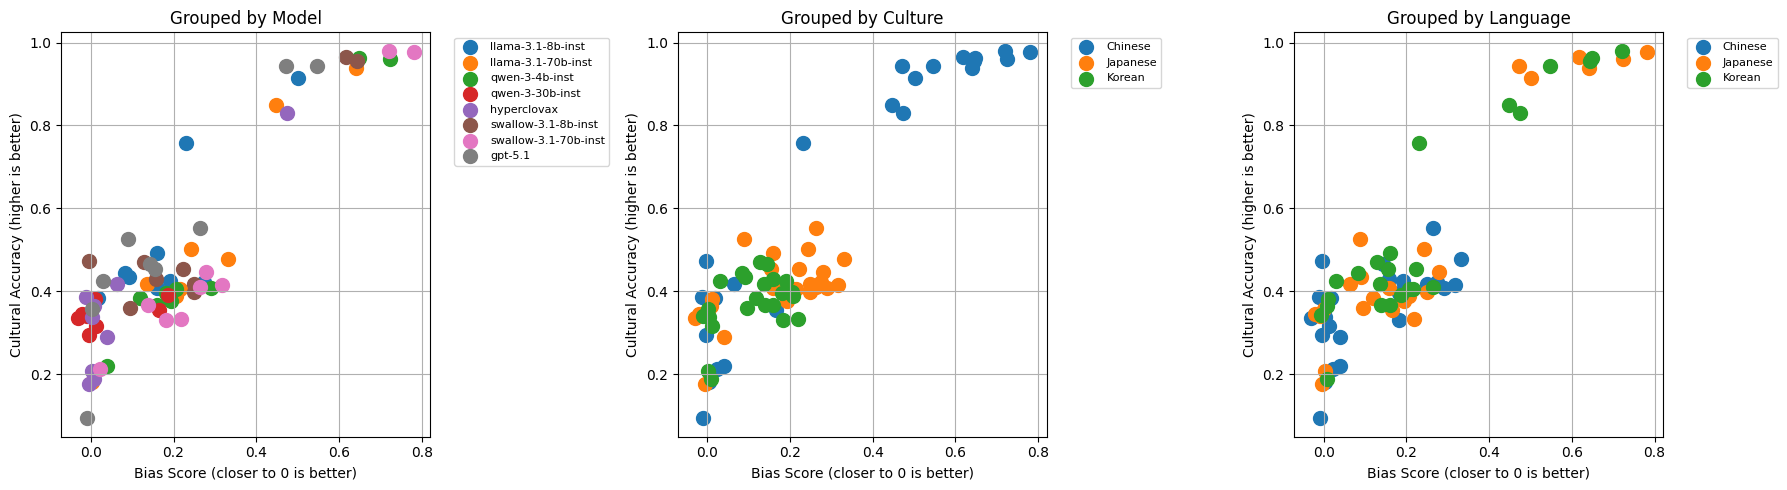

In [30]:
tradeoff(df)

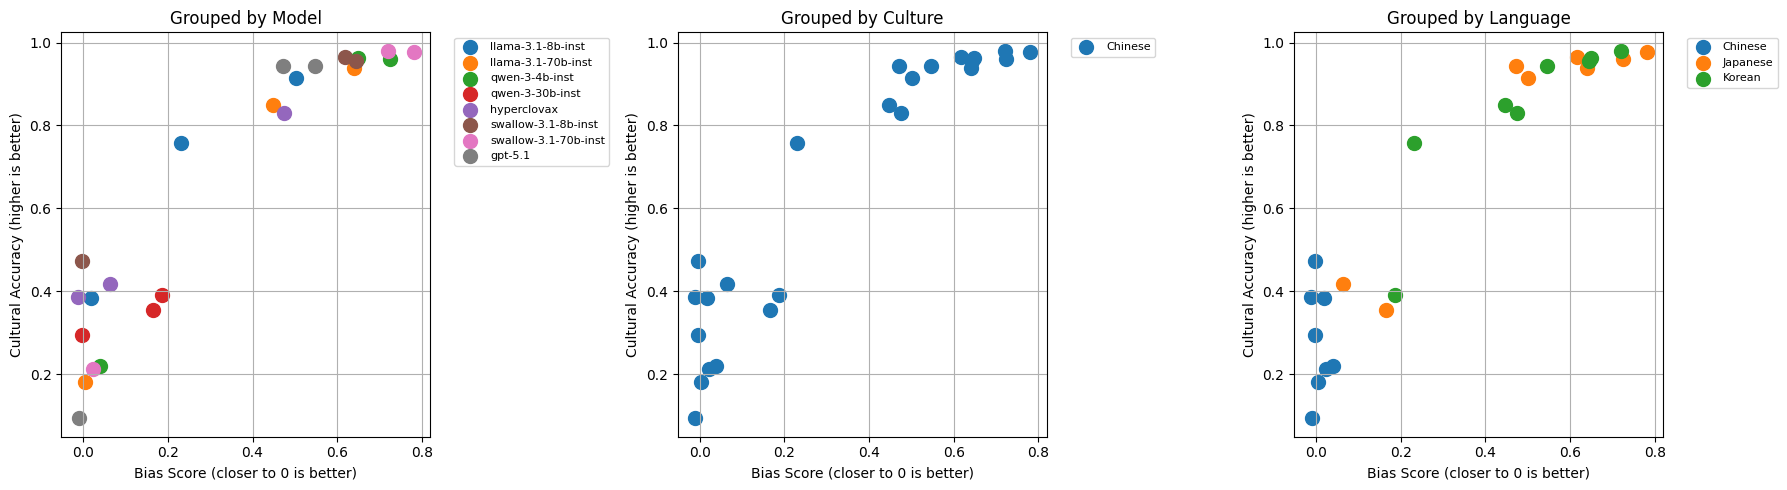

In [31]:
tradeoff(df, filter_culture='Chinese')

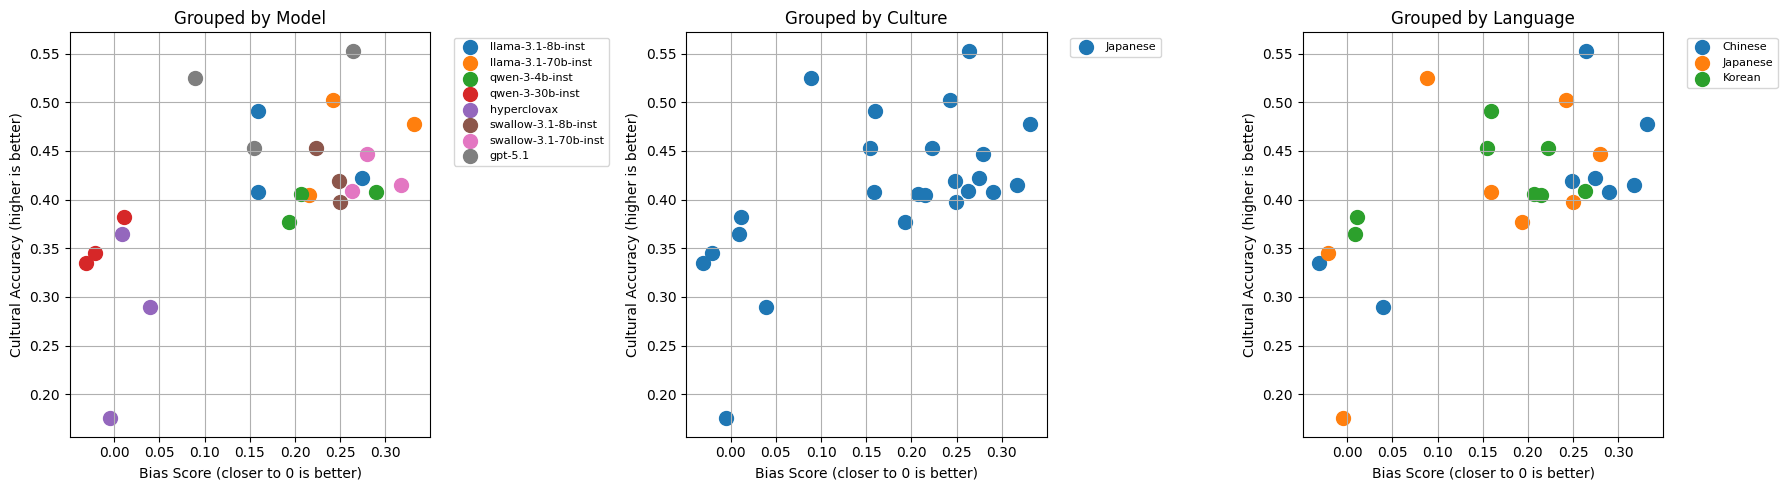

In [32]:
tradeoff(df, filter_culture='Japanese')

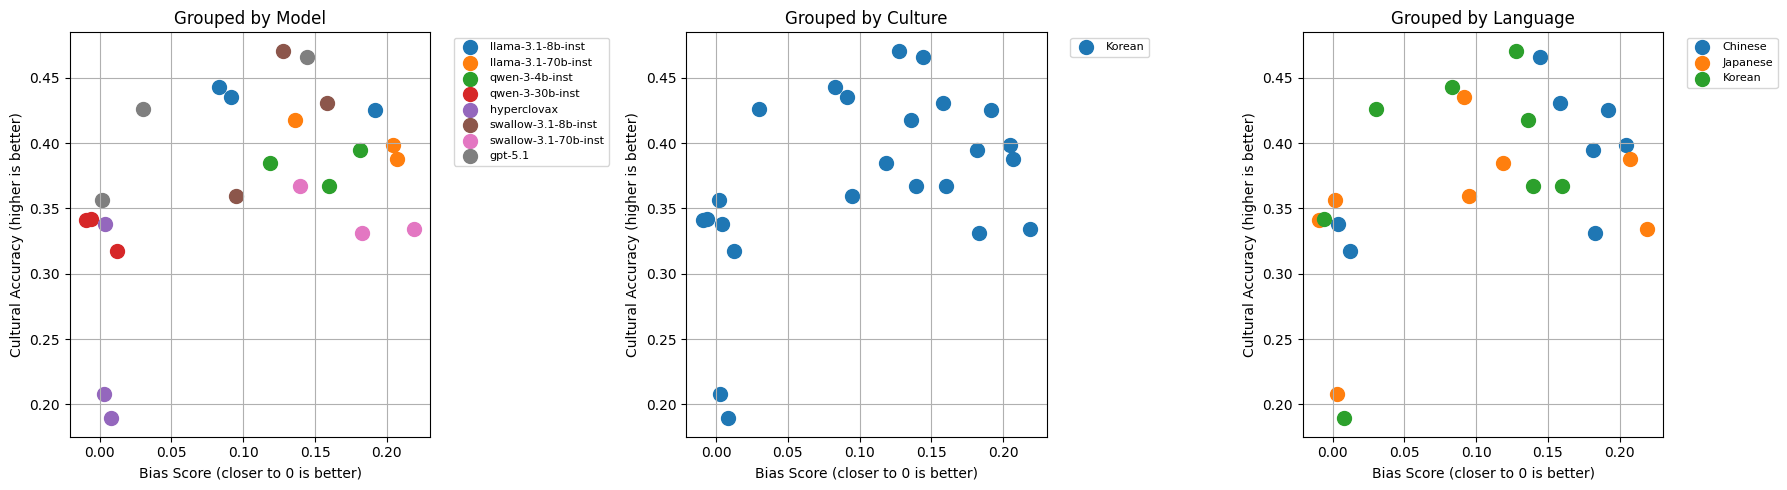

In [33]:
tradeoff(df, filter_culture='Korean')

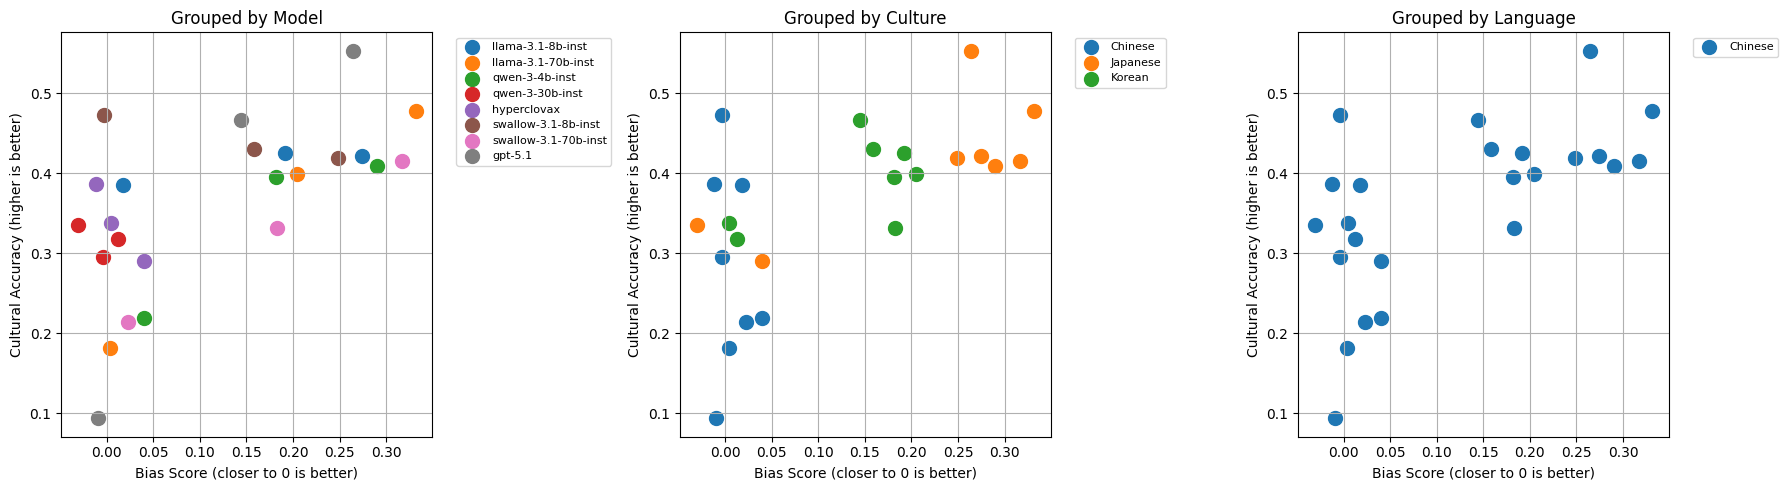

In [34]:
tradeoff(df, filter_language='Chinese')

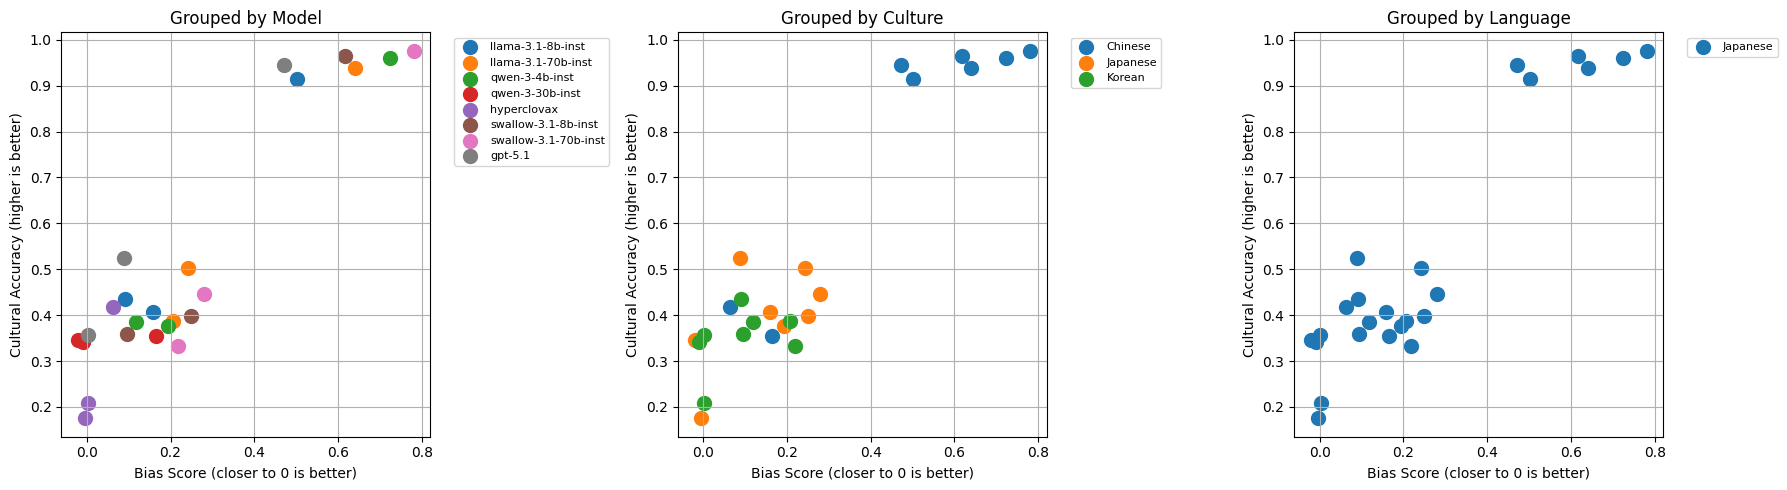

In [35]:
tradeoff(df, filter_language='Japanese')

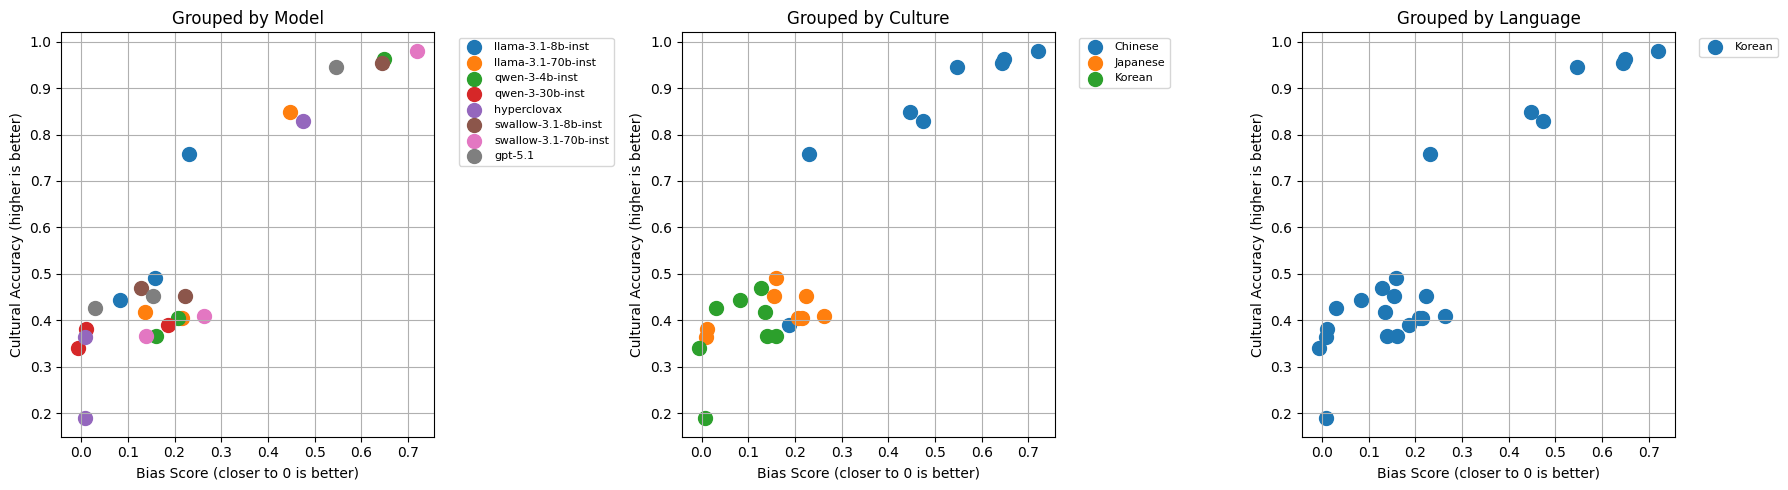

In [36]:
tradeoff(df, filter_language='Korean')

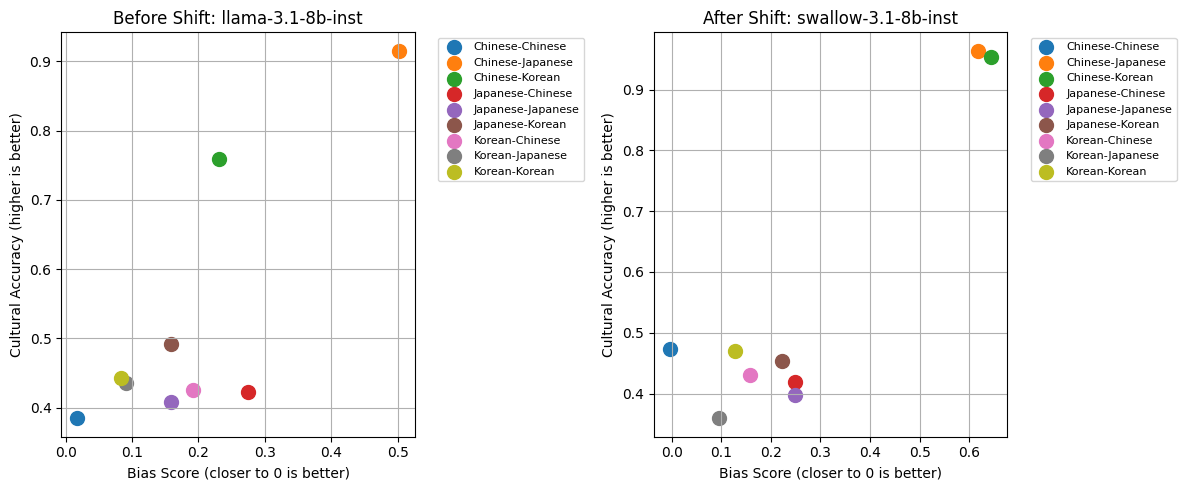

In [37]:
shift_scatter(df, before_model='llama-3.1-8b-inst', after_model='swallow-3.1-8b-inst')

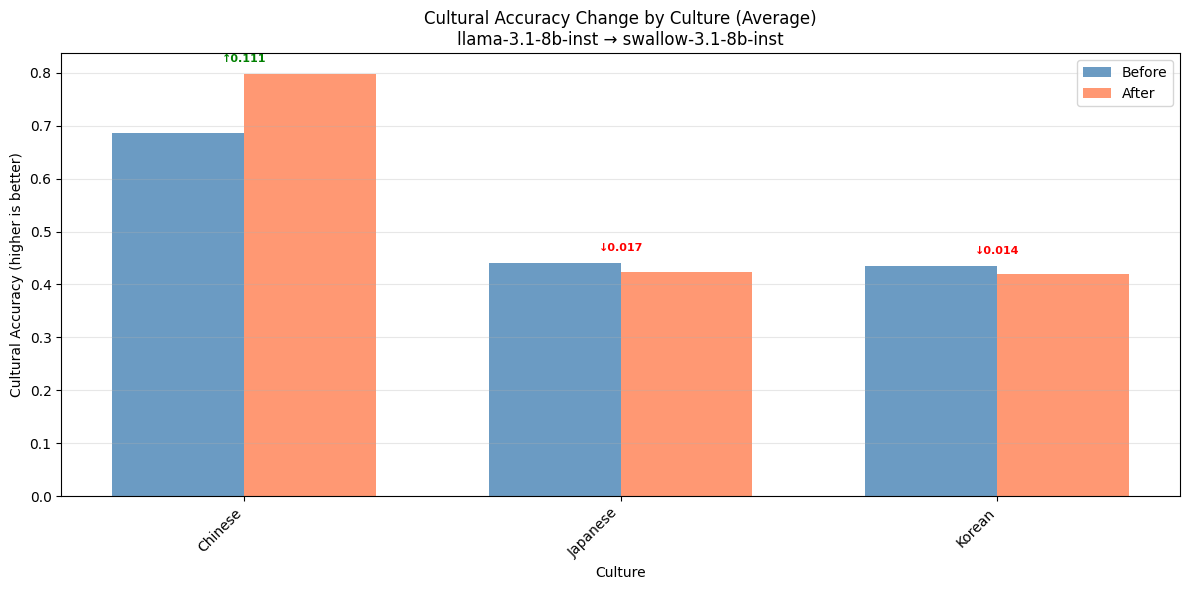

In [38]:
shift_comparison(
    df,
    before_model='llama-3.1-8b-inst',
    after_model='swallow-3.1-8b-inst',
    group_by='culture',
    metric='accuracy'
)

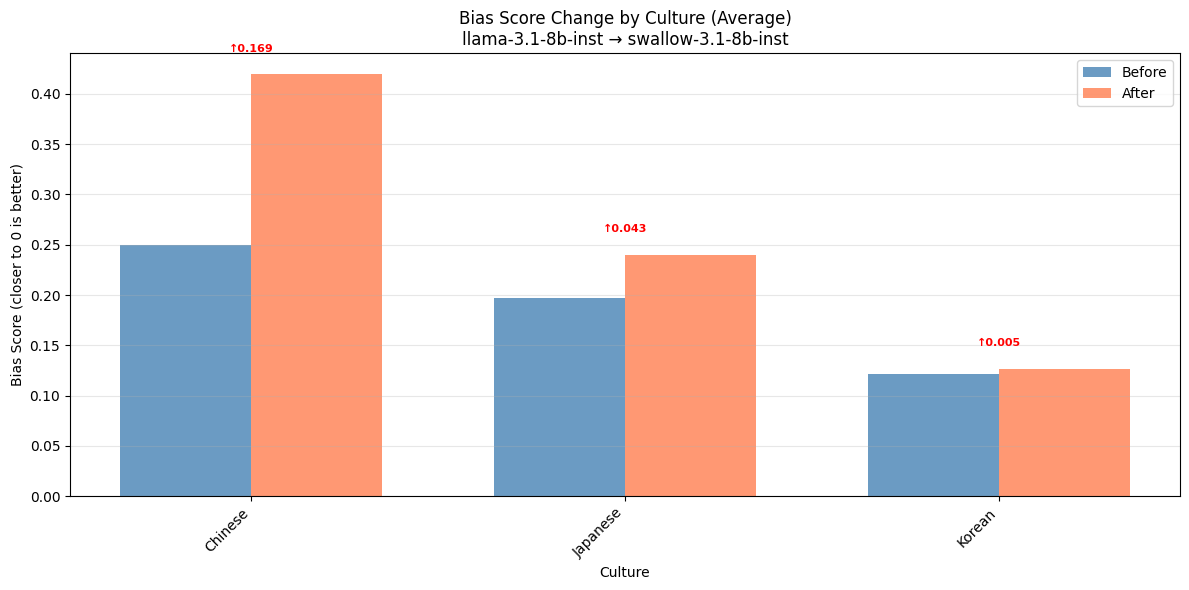

In [39]:
shift_comparison(
    df,
    before_model='llama-3.1-8b-inst',
    after_model='swallow-3.1-8b-inst',
    group_by='culture',
    metric='bias'
)

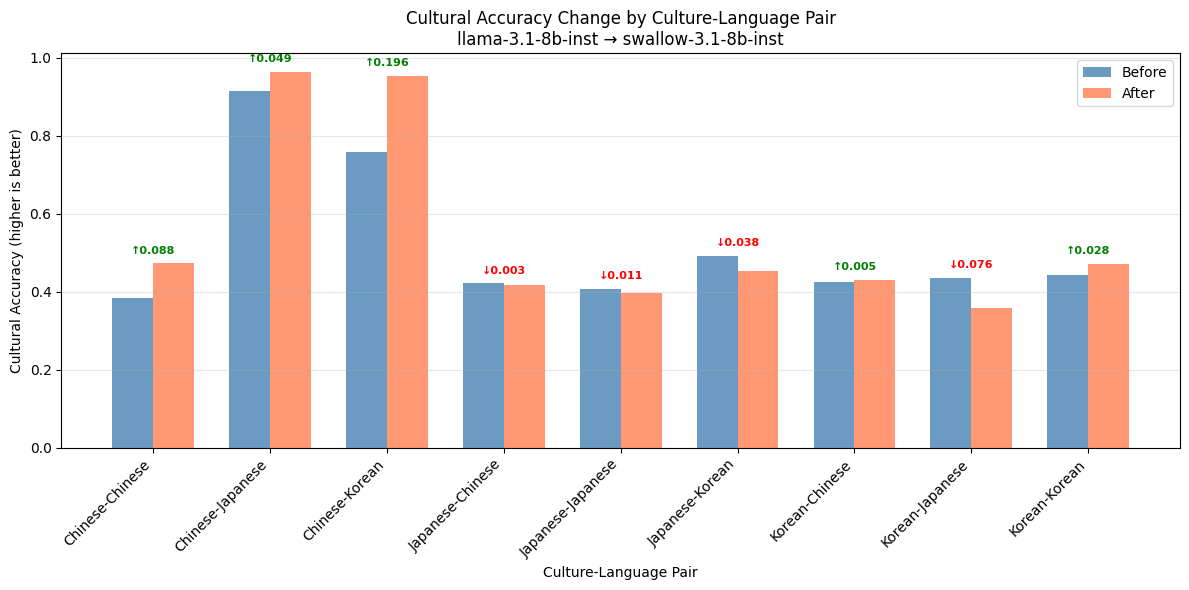

In [40]:
shift_comparison(
    df, 
    before_model='llama-3.1-8b-inst', 
    after_model='swallow-3.1-8b-inst', 
    group_by='combo', 
    metric='accuracy'
)

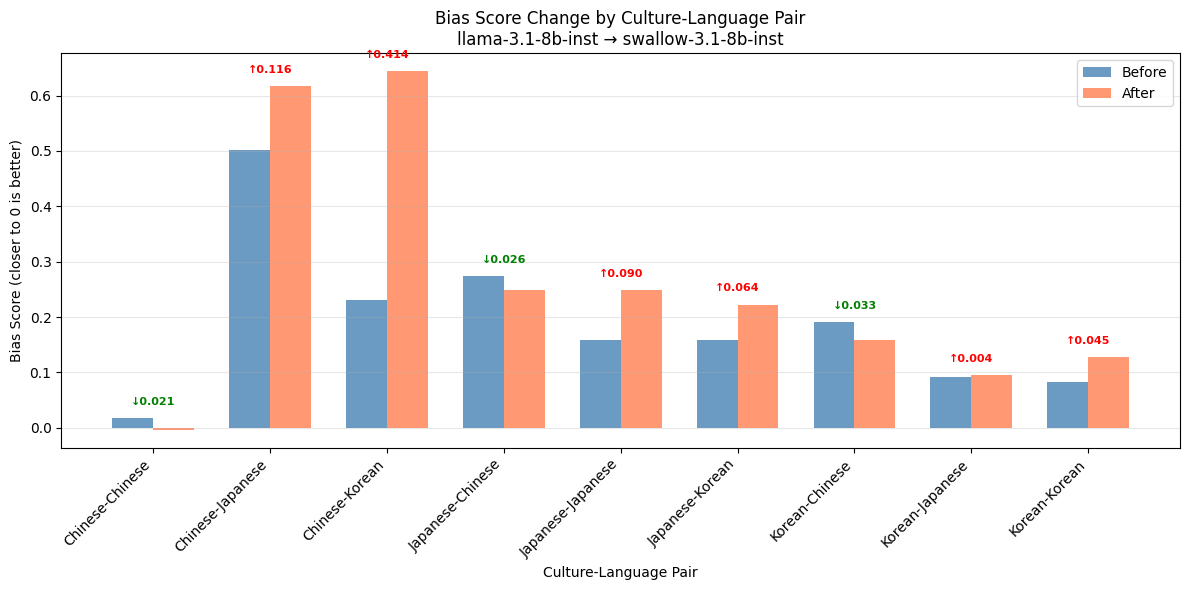

In [41]:
shift_comparison(
    df, 
    before_model='llama-3.1-8b-inst', 
    after_model='swallow-3.1-8b-inst', 
    group_by='combo', 
    metric='bias'
)

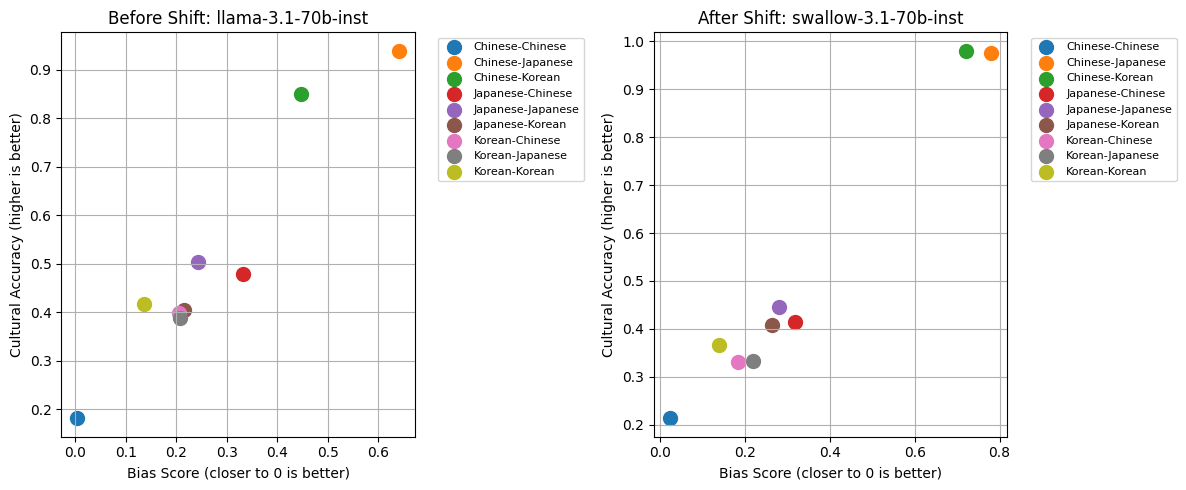

In [42]:
shift_scatter(df, before_model='llama-3.1-70b-inst', after_model='swallow-3.1-70b-inst')

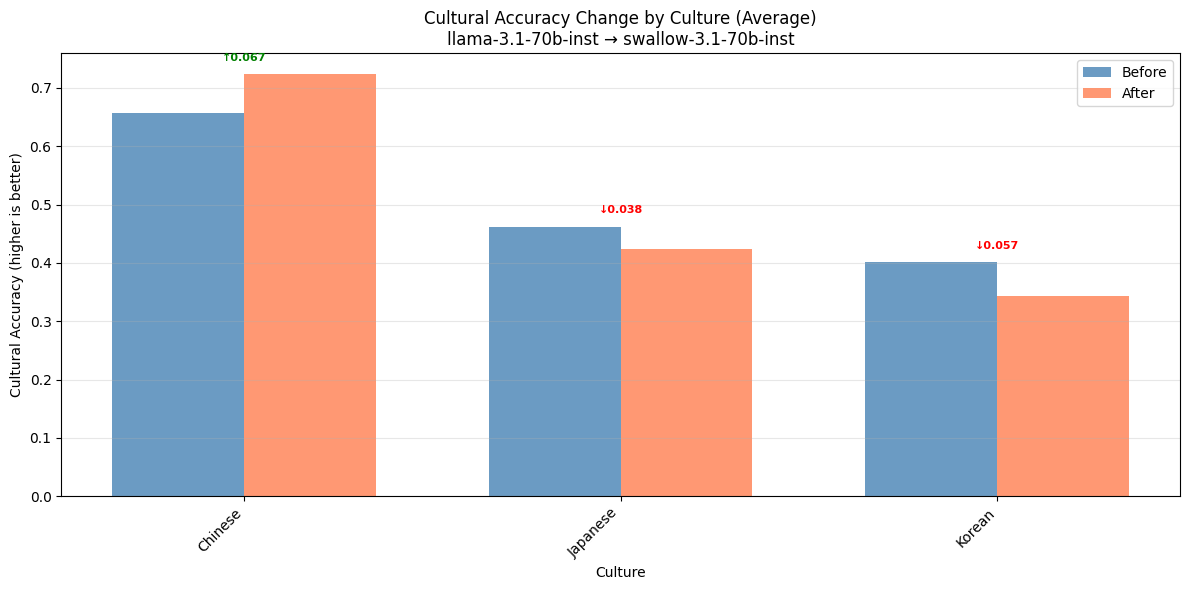

In [43]:
shift_comparison(
    df,
    before_model='llama-3.1-70b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='culture',
    metric='accuracy'
)

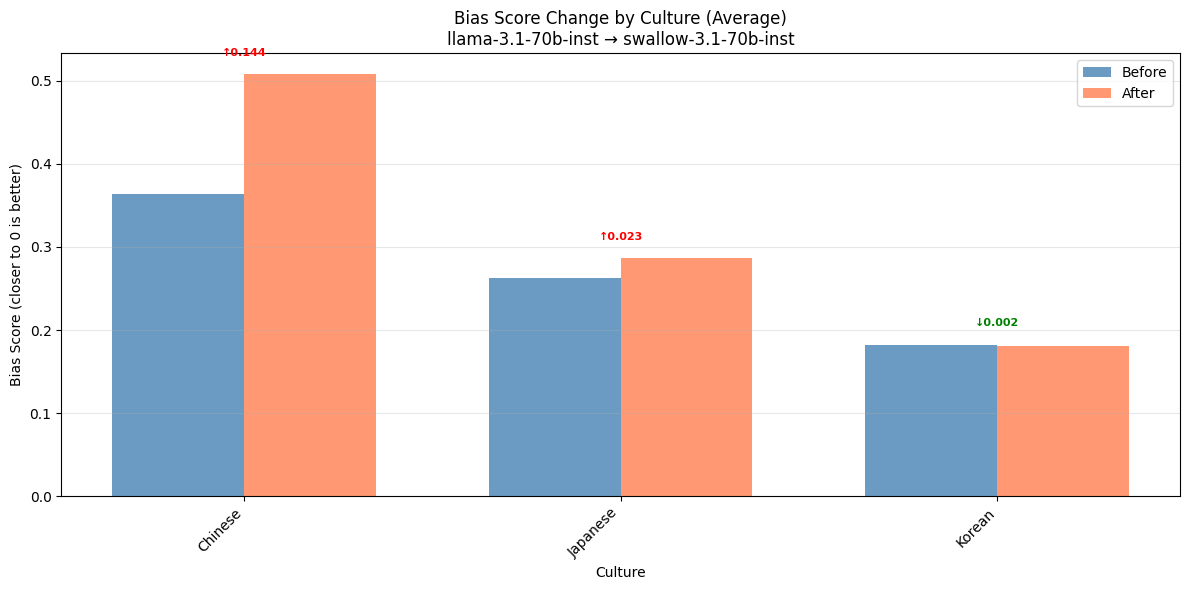

In [44]:
shift_comparison(
    df,
    before_model='llama-3.1-70b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='culture',
    metric='bias'
)

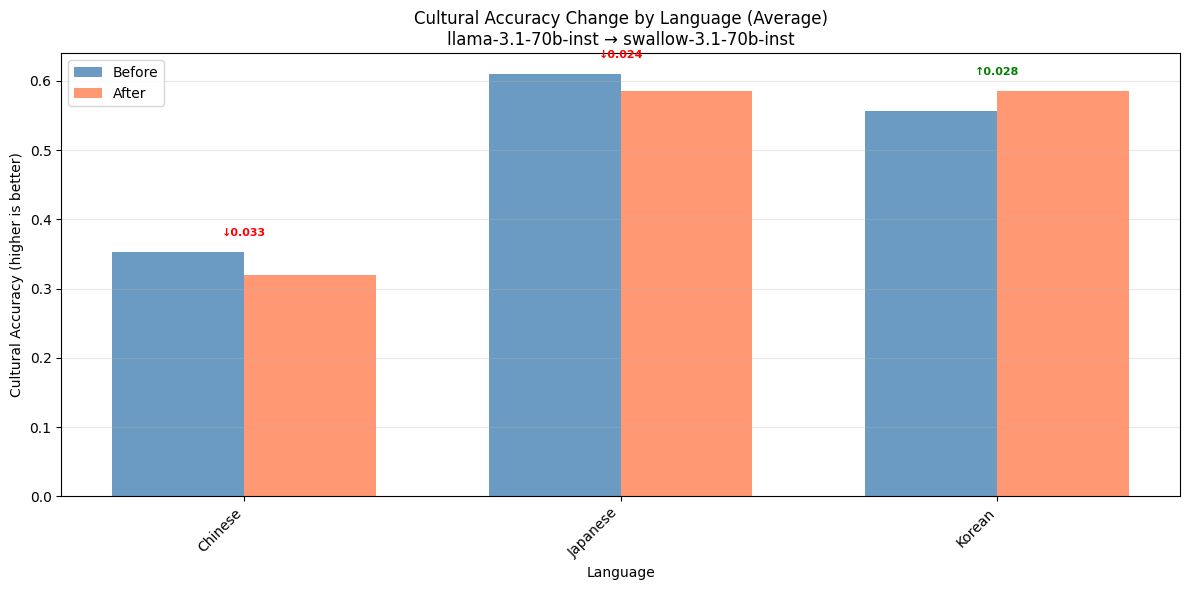

In [45]:
shift_comparison(
    df,
    before_model='llama-3.1-70b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='language',
    metric='accuracy'
)

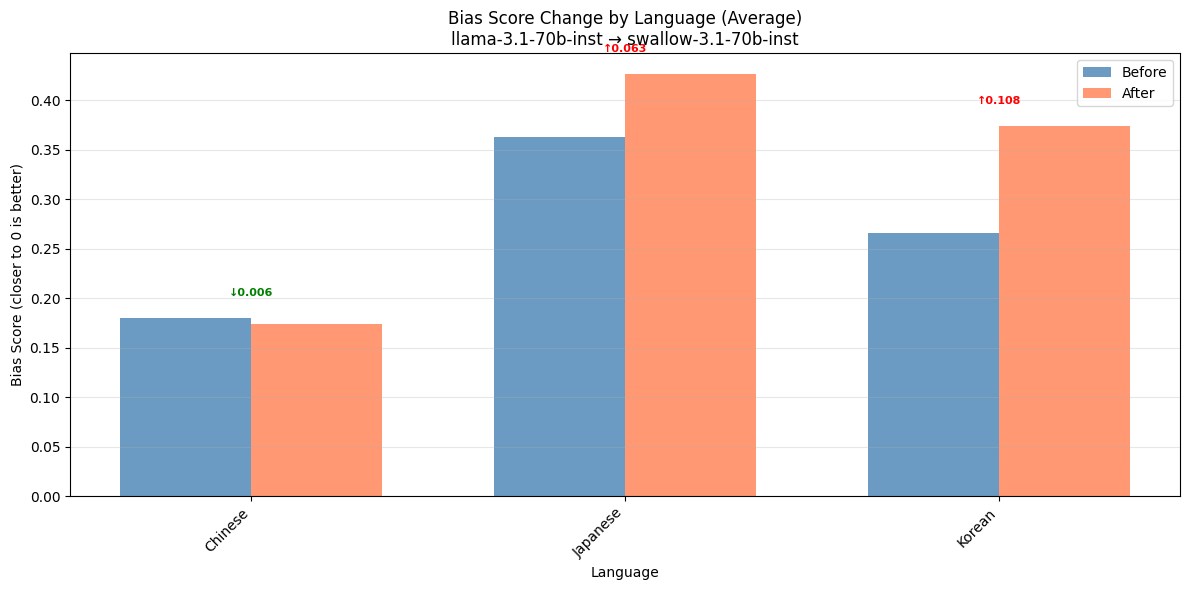

In [46]:
shift_comparison(
    df,
    before_model='llama-3.1-70b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='language',
    metric='bias'
)

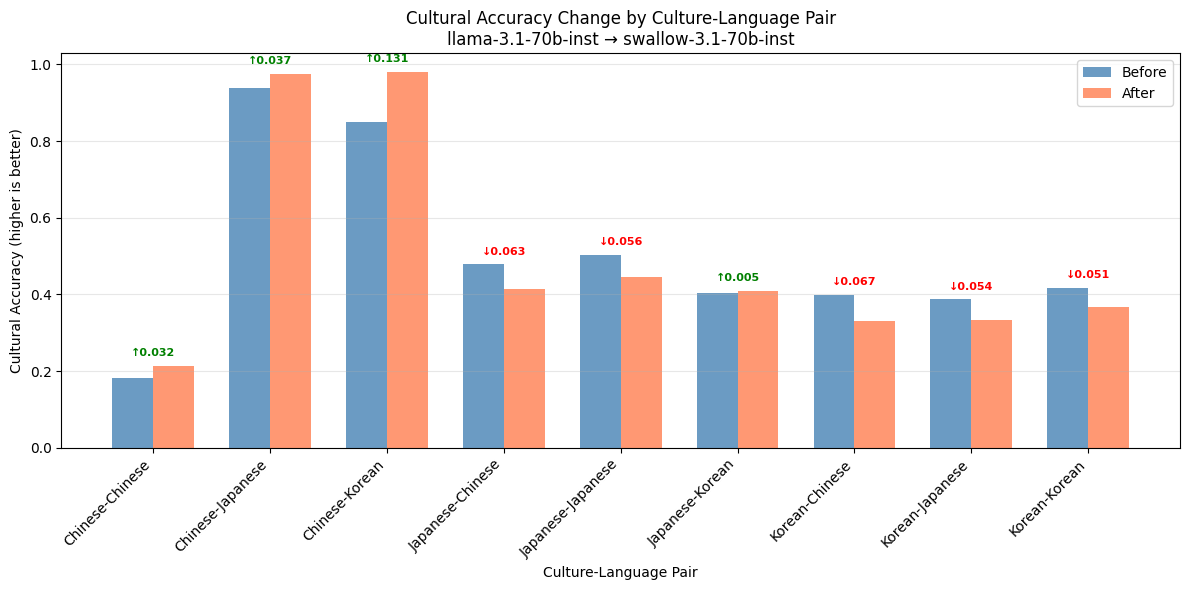

In [47]:
shift_comparison(
    df,
    before_model='llama-3.1-70b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='combo',
    metric='accuracy'
)

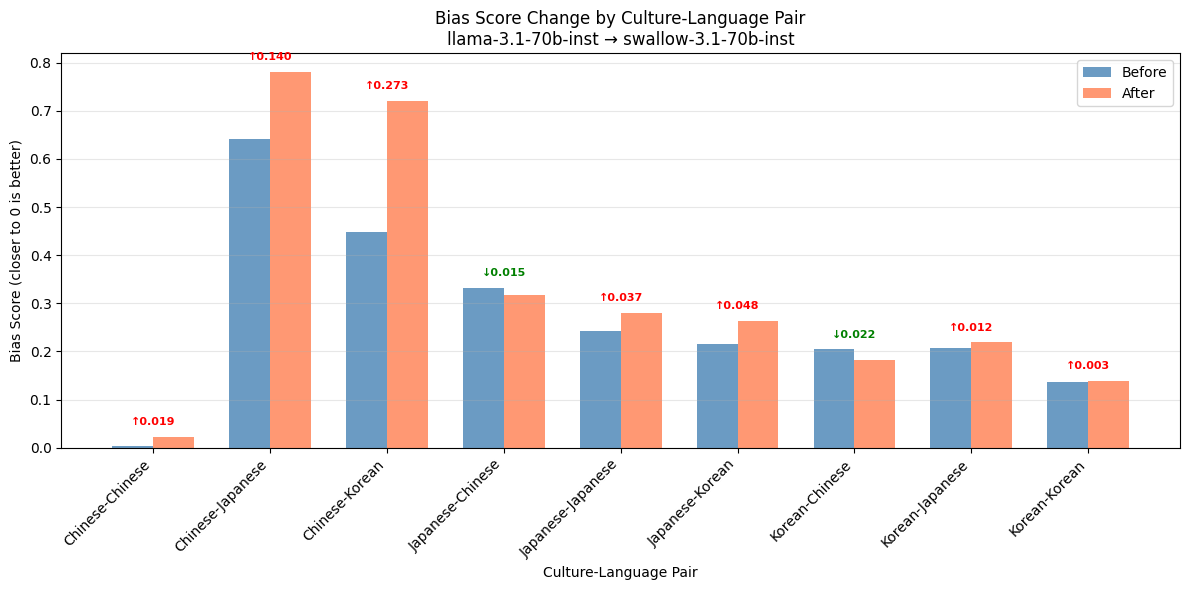

In [48]:
shift_comparison(
    df,
    before_model='llama-3.1-70b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='combo',
    metric='bias'
)